In [115]:
from numpy import array
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from autogluon.tabular import TabularPredictor as task
import numpy as np
import copy
from sklearn.preprocessing import RobustScaler


/auto/home/sam_kruse/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
cols = [i for i in range(1,209)]
cols.extend(["time", "ground_truth"])
df = pd.DataFrame(columns = cols)

/auto/home/sam_kruse/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
skip = [15] 
for i in range(10,19):
    if i not in skip:
        df = pd.concat([df, read_csv("wifiSensing-main/data/data_"+ str(i)+ "/final_dataset.csv", names = cols)])
#subs_df["time"] = final_df.time
df

/auto/home/sam_kruse/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [121]:
print(df.shape)
scaler = RobustScaler()

(3600, 54)


In [122]:
scale_data = scaler.fit_transform(df.drop(columns = "time"))

In [166]:
df_scale = pd.DataFrame(scale_data)
df_scale["ground_truth"] = df_scale[52]
df_scale = df_scale.drop(columns = 52)
df_scale

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,ground_truth
0,-0.375762,-0.429143,-0.346563,-0.342966,-0.143625,-0.157180,-0.161380,-0.142439,-0.144656,-0.288892,...,-0.431613,-0.287171,-0.322432,-0.332853,-0.333448,-0.462740,-0.335451,-0.336593,0.492782,0.806633
1,-0.372772,-0.569201,-0.508334,-0.493492,0.003592,0.004040,0.005516,0.003294,0.003449,-0.141012,...,-0.428624,-0.427298,-0.480234,-0.328877,-0.329459,-0.459261,-0.331964,-0.333115,-0.655371,0.827592
2,-0.370616,-0.567357,-0.506203,-0.491510,0.006673,0.007414,0.009008,0.006344,0.006548,-0.138218,...,-0.426468,-0.425138,-0.477803,-0.326010,-0.326582,-0.456751,1.010725,-0.163505,0.669068,0.821583
3,-0.365065,-0.418469,-0.334234,-0.331493,-0.129869,0.332530,0.345569,0.300229,-0.130817,-0.131027,...,-0.565327,-0.564231,0.180050,0.185510,0.186609,0.390201,0.519256,0.515969,-0.647770,0.824739
4,-0.338958,-0.392416,-0.304142,-0.303493,1.533944,0.381554,0.396318,0.197833,0.201155,-0.545116,...,0.197733,0.200113,0.226319,0.233240,0.234496,0.269848,0.571450,0.568032,1.253402,0.818980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,0.196393,2.139081,-0.181416,-0.189298,-0.143212,-0.156728,0.001192,0.141068,0.143465,-0.000418,...,-0.431292,-0.000469,0.806568,0.665506,0.501308,0.369500,0.498513,0.661577,0.328972,0.656871
3596,-0.229173,-0.569007,-0.177601,-0.185748,-0.282892,-0.309695,-0.319263,-0.280303,-0.140495,-0.574126,...,-0.571737,-0.570652,0.651873,0.672245,0.340237,0.375277,0.504302,0.501053,0.334684,0.658438
3597,-0.233027,2.137383,-0.346743,-0.189882,-0.286747,-0.313916,-0.323633,-0.284119,-0.288642,-0.433055,...,-0.431769,-0.430448,-0.322632,0.830640,-0.333655,-0.296627,-0.168994,-0.170554,-0.329638,0.487624
3598,-0.230226,-0.569795,-0.509019,-0.494130,-0.570491,-0.467748,-0.482880,-0.423173,-0.285823,-0.574921,...,-0.572527,-0.571443,0.972885,1.003402,-0.330385,-0.293367,-0.165727,-0.167295,-0.326415,0.489053


In [ ]:
def fit_model(train_dataset):
    metric = 'root_mean_squared_error'
    label_column = "ground_truth"
    print("train....")
    predictor = task(label=label_column, problem_type='regression', eval_metric=metric, path = "./wifiSensing-main/autoresults").fit(train_data=train_dataset, presets = "best_quality",  verbosity = 2, time_limit = 3*60, auto_stack=True)
    return predictor
new_predict = fit_model(df_scale)

/auto/home/sam_kruse/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 180s
AutoGluon will save models to "./wifiSensing-main/autoresults/"
AutoGluon Version:  0.2.0
Train Data Rows:    3600
Train Data Columns: 52
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    13917.39 MB
	Train Data (Original)  Memory Usage: 1.5 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fi

train....


Fitting model: KNeighborsUnif_BAG_L1 ... Training model for up to 119.92s of the 179.93s of remaining time.
	-0.3761	 = Validation root_mean_squared_error score
	0.11s	 = Training runtime
	0.27s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1 ... Training model for up to 119.39s of the 179.39s of remaining time.
	-0.0	 = Validation root_mean_squared_error score
	0.0s	 = Training runtime
	0.25s	 = Validation runtime
Fitting model: LightGBMXT_BAG_L1 ... Training model for up to 119.03s of the 179.04s of remaining time.


[1000]	train_set's rmse: 0.030642	valid_set's rmse: 0.160029
[2000]	train_set's rmse: 0.00838476	valid_set's rmse: 0.147848
[3000]	train_set's rmse: 0.00289601	valid_set's rmse: 0.146477
[4000]	train_set's rmse: 0.00109699	valid_set's rmse: 0.146287
[5000]	train_set's rmse: 0.000431725	valid_set's rmse: 0.146253


	Ran out of time, early stopping on iteration 5844. Best iteration is:
	[5836]	train_set's rmse: 0.000198826	valid_set's rmse: 0.146233


[1000]	train_set's rmse: 0.0290295	valid_set's rmse: 0.165044
[2000]	train_set's rmse: 0.00814193	valid_set's rmse: 0.158301
[3000]	train_set's rmse: 0.00297704	valid_set's rmse: 0.157713
[1000]	train_set's rmse: 0.0327094	valid_set's rmse: 0.111818
[2000]	train_set's rmse: 0.0088649	valid_set's rmse: 0.0894437
[3000]	train_set's rmse: 0.00315858	valid_set's rmse: 0.0873803
[4000]	train_set's rmse: 0.00120678	valid_set's rmse: 0.0871282
[5000]	train_set's rmse: 0.000478382	valid_set's rmse: 0.0871166
[1000]	train_set's rmse: 0.0310365	valid_set's rmse: 0.113434
[2000]	train_set's rmse: 0.0084605	valid_set's rmse: 0.0945852
[3000]	train_set's rmse: 0.00281522	valid_set's rmse: 0.0924903
[4000]	train_set's rmse: 0.00102265	valid_set's rmse: 0.0922026
[5000]	train_set's rmse: 0.000385673	valid_set's rmse: 0.0921596
[6000]	train_set's rmse: 0.000147971	valid_set's rmse: 0.0921529


	Ran out of time, early stopping on iteration 6598. Best iteration is:
	[5815]	train_set's rmse: 0.000176286	valid_set's rmse: 0.0921507


[1000]	train_set's rmse: 0.0303641	valid_set's rmse: 0.118369
[2000]	train_set's rmse: 0.0077962	valid_set's rmse: 0.105036
[3000]	train_set's rmse: 0.00251788	valid_set's rmse: 0.104087


In [ ]:
#predictor = task.load("./wifiSensing-main/autoresults/")
new_predict.leaderboard()

In [ ]:
def forecast(predictor, input_x, model = None ):
    input_x_no_label = input_x.drop(columns = ["ground_truth"])
    prediction_sequence = predictor.predict(input_x_no_label, model = model).tolist()
    return prediction_sequence

#ouput = forecast(predictor, subs_df)

In [ ]:
#plt.plot(ouput, label = "estimate")
#plt.plot(subs_df.ground_truth, label = "actual")
#plt.legend()
df_scale

In [ ]:
cols = [i for i in range(0,208)]
cols.extend(["time", "ground_truth"])
test_17= read_csv("wifiSensing-main/data/data_16/final_dataset.csv", names = cols)

test_17 = test_17.drop(columns = list(range(52,208)))
test_17 = test_17.drop(columns = "time")
test_17

In [ ]:
cols = [i for i in range(0,52)]
cols.append("ground_truth")

scale_17 = scaler.transform(test_17)
#new_predict.leaderboard(data = test_17.drop(columns = "time"))
df_17 = pd.DataFrame(scale_17, columns = cols)



In [165]:
output = forecast(new_predict, df_17)
#output

/auto/home/sam_kruse/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: "1 required columns are missing from the provided dataset to transform using AutoMLPipelineFeatureGenerator. Missing columns: ['52']"

/auto/home/sam_kruse/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


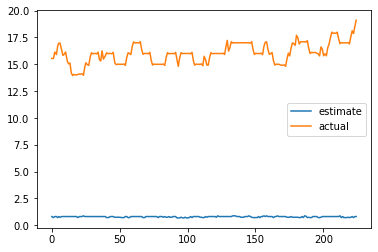

In [152]:


plt.plot(test_17.time,output, label = "estimate")
plt.plot(test_17.time,test_17.ground_truth, label = "actual")
plt.legend()

In [80]:
new_predict.leaderboard(data = test_17)

/auto/home/sam_kruse/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                     model  score_test  score_val  pred_time_test  pred_time_val   fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        LightGBMXT_BAG_L1   -3.963037  -1.957382        0.480292       0.069862  32.943192                 0.480292                0.069862          32.943192            1       True          3
1          LightGBM_BAG_L1   -4.100051  -2.076981        0.072212       0.033121   5.424186                 0.072212                0.033121           5.424186            1       True          4
2          LightGBM_BAG_L2   -4.107991  -1.882133        0.758580       0.479651  44.511157                 0.052535                0.023144           4.983449            2       True         10
3      WeightedEnsemble_L2   -4.141860  -1.903903        0.515869       0.156015  33.159487                 0.003222                0.000563           0.213274            2       True          6
4     ExtraTreesMSE_BAG_L

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L1,-3.963037,-1.957382,0.480292,0.069862,32.943192,0.480292,0.069862,32.943192,1,True,3
1,LightGBM_BAG_L1,-4.100051,-2.076981,0.072212,0.033121,5.424186,0.072212,0.033121,5.424186,1,True,4
2,LightGBM_BAG_L2,-4.107991,-1.882133,0.758580,0.479651,44.511157,0.052535,0.023144,4.983449,2,True,10
3,WeightedEnsemble_L2,-4.141860,-1.903903,0.515869,0.156015,33.159487,0.003222,0.000563,0.213274,2,True,6
4,ExtraTreesMSE_BAG_L2,-4.156907,-1.841132,0.799224,0.595408,40.317421,0.093178,0.138901,0.789714,2,True,13
5,RandomForestMSE_BAG_L2,-4.158453,-1.882246,0.806233,0.595844,40.824117,0.100188,0.139337,1.296410,2,True,11
6,CatBoost_BAG_L2,-4.162992,-1.875211,0.748040,0.477006,43.325671,0.041995,0.020499,3.797964,2,True,12
7,RandomForestMSE_BAG_L1,-4.168190,-2.186258,0.100432,0.137874,1.147940,0.100432,0.137874,1.147940,1,True,5
8,WeightedEnsemble_L3,-4.174342,-1.833224,1.051181,0.743124,55.692270,0.003911,0.000580,0.295436,3,True,14
9,LightGBMXT_BAG_L2,-4.189691,-1.870151,0.834578,0.483063,45.823766,0.128532,0.026556,6.296058,2,True,9


In [4]:
plt.plot(output, label = "estimate")
plt.plot(subs_17.ground_truth, label ="actual")
plt.legend()

NameError: name 'output' is not defined

In [32]:
#predictor